<a href="https://colab.research.google.com/github/Mansihpatel/MachineLearning/blob/main/IceCream_sales_SimplelinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Revenue Prediction Using Simple Linear Regression

Problem Statement

An ice cream business will like to predict the daily revenue generated in dollars based on the outside air temperature(degC). In this project, I applied Linear Regression model to solve the task. Dataset is obtained from Kaggle - https://www.kaggle.com/ahmednour/ice-cream-dataset In the dataset, there are two fields -

Independent variable X: Outside Air Temperature in degree Celsius 

Dependent variable Y: Overall daily revenue generated in dollars.


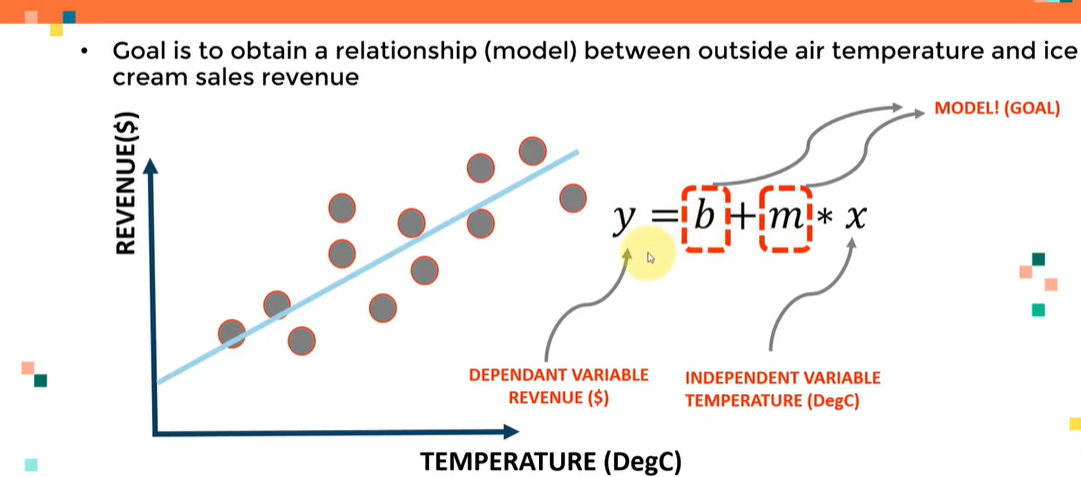

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [65]:
# import dataset
df = pd.read_csv("/content/IceCreamData.csv")
df.head()


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [66]:
max(df.Temperature)

45.0

In [67]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [68]:
# shape will return number of rows and column in dataframe
df.shape

(500, 2)

In [69]:
#Dataset statistic
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


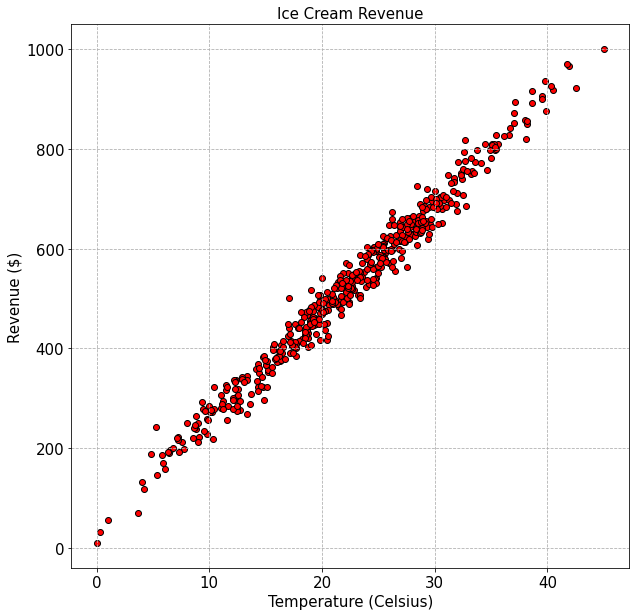

In [70]:
#Plotting features with matplotlib
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Ice Cream Revenue', fontsize=15)
ax.scatter(df['Temperature'].values,df['Revenue'].values,marker='o', color='r', alpha=1, linewidth=1, 
            edgecolor='k', label='one')
ax.set_xlabel('{} (Celsius)'.format(df.columns[0]), fontsize=15)
ax.set_ylabel('{} ($)'.format(df.columns[1]), fontsize=15)
ax.grid(b=True, which='major', linestyle='--')
ax.tick_params(axis='both', labelsize=15, labelcolor='k')

In [71]:
#Splitting Data into X and y( independent and dependent variable)
X=df.drop('Revenue', axis=1)
y=df['Revenue']

In [72]:
#Splitting the Dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((350, 1), (150, 1), (350,), (150,))

Model Building

In [73]:
# Multiple Linear Regression Regression
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression(fit_intercept=True)
lr_regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
# y= mx+c
lr_regressor.coef_ ,lr_regressor.intercept_

(array([21.37822239]), 46.91550104676264)

In [86]:
# Equation for y is

# ***************     y = 46.91550104676264 + 21.37822239(x)



In [76]:
# Predicting Test Set Multiple Linear Regression Regression
y_pred = lr_regressor.predict(X_test)


from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

results = pd.DataFrame([['Multiple Linear Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

In [77]:
results

,Model,MAE,MSE,RMSE,R2 Score
0,Multiple Linear Regression,17.976808,503.354709,22.435568,0.985401


In [78]:
y_pred

array([697.40760182, 652.67518783, 664.01048102, 451.14537645,
       664.75022673, 442.05219958, 583.85242913, 623.3625391 ,
       666.7500596 , 469.23604811, 546.84832099, 444.08266531,
       622.49432909, 378.73035124, 368.21119457, 943.18564123,
       891.63651167, 693.5479008 , 546.07634654, 421.39940399,
       392.08451996, 596.71982427, 284.91295994, 654.83874688,
       382.05091808, 413.18421083, 372.17594967, 510.48997583,
       480.14543708, 457.26943784, 639.55061011, 283.33932566,
       315.67211819, 470.5172469 , 559.66448707, 539.8163622 ,
       309.24695716, 508.91264932, 571.29876902, 731.11193473,
       441.12952919, 494.7446538 , 567.45606027, 444.60923294,
       912.17744272, 602.86026073, 541.88552358, 202.15022192,
       693.13862264, 352.35035317, 191.75736834, 576.63952464,
       218.6500316 , 468.66672894, 462.36421819, 449.07885871,
       495.24147022, 799.7974912 , 332.62076008, 540.48871157,
       660.49777207, 526.81456218, 361.85571542, 452.08

In [79]:
y_test

90     704.281439
254    632.901914
283    662.558990
445    449.813300
461    636.298374
          ...    
4      316.240194
318    639.538012
331    678.751388
245    334.433720
5      367.940744
Name: Revenue, Length: 150, dtype: float64

Text(0.5, 1.0, 'Revenue vs Temperature at Ice Cream Stand (Training set)')

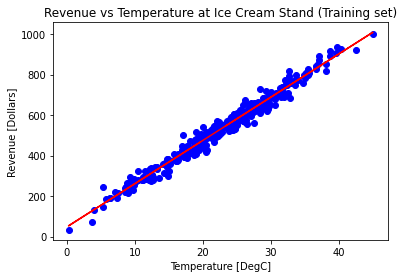

In [80]:
plt.scatter(X_train,y_train, color="blue")
plt.plot(X_train, lr_regressor.predict(X_train), color = 'red')
plt.xlabel("Temperature [DegC]")
plt.ylabel("Revenue [Dollars]")
plt.title("Revenue vs Temperature at Ice Cream Stand (Training set)")

Text(0.5, 1.0, 'Revenue vs Temperature at Ice Cream Stand (Testing set)')

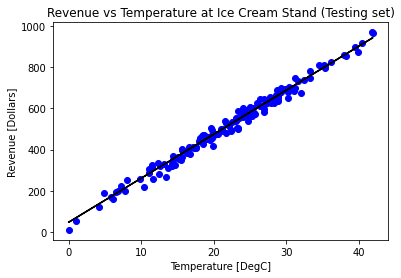

In [81]:
plt.scatter(X_test,y_test, color="blue")
plt.plot(X_test, lr_regressor.predict(X_test), color = 'black')
plt.xlabel("Temperature [DegC]")
plt.ylabel("Revenue [Dollars]")
plt.title("Revenue vs Temperature at Ice Cream Stand (Testing set)")

In [82]:
# Predict the revenue in dollars that will be generated when the temperature is 40 degC
T = np.array([20]).reshape(1, 1)
revenue= lr_regressor.predict(T)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [83]:
revenue

array([474.47994883])

In [87]:
# from equation find the Revenue at 20 DegC
y20 = 46.91550104676264 + 21.37822239*20
y20

474.4799488467627